In [1]:

import pandas as pd 
import seaborn as sns
df = pd.read_csv("../data/regression/weatherHistory.csv")
df['Summary'] = pd.factorize(df['Summary'])[0] + 1
df['Precip Type'] = pd.factorize(df['Precip Type'])[0] + 1
df['Daily Summary'] = pd.factorize(df['Daily Summary'])[0] + 1
column = 'Pressure (millibars)'
df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
df.describe()
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,1,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,0.970135,1
1,2006-04-01 01:00:00.000 +0200,1,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,0.970613,1
2,2006-04-01 02:00:00.000 +0200,2,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,0.970909,1
3,2006-04-01 03:00:00.000 +0200,1,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,0.971358,1
4,2006-04-01 04:00:00.000 +0200,2,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,0.971454,1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_868\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

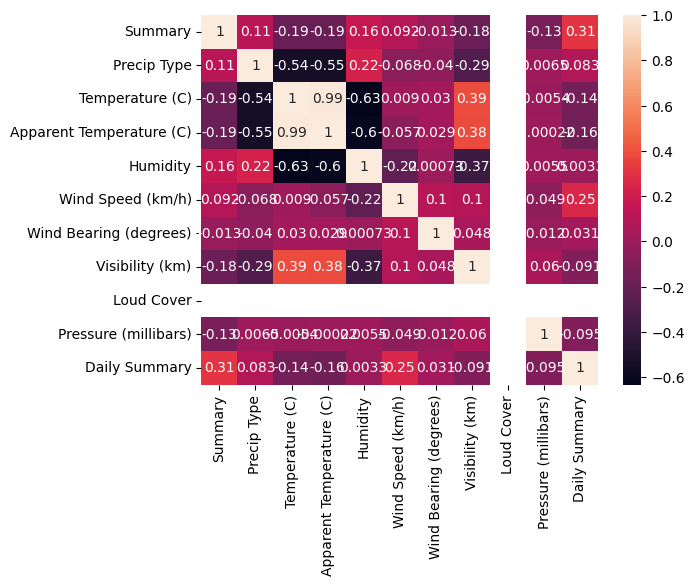

In [81]:
sns.heatmap(df.corr(),annot=True)

In [82]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [83]:
X = df[['Summary', 'Precip Type','Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary']]


In [84]:
y = df['Temperature (C)']

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [87]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()


In [88]:
lm.fit(X_train,y_train)

LinearRegression()

In [59]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Y')

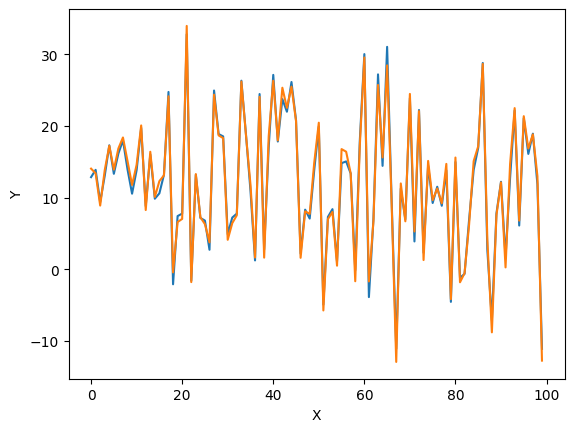

In [131]:
import matplotlib.pyplot as plt
import numpy as np
 
x = list(range(len(df)))
plt.plot(x[:100], y_test[:100])
plt.plot(x[:100], predictions[:100])
plt.xlabel('X')
plt.ylabel('Y')



<Axes: xlabel='Temperature (C)', ylabel='Count'>

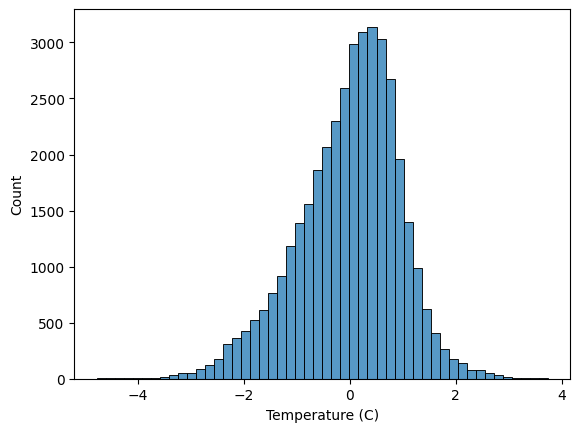

In [94]:
sns.histplot((y_test-predictions),bins=50)

In [98]:
import numpy as np
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 0.9543304352697234


In [97]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Summary,-1.575048e-02
Precip Type,1.117225e-01
Apparent Temperature (C),8.744221e-01
Humidity,-1.379518e+00
Wind Speed (km/h),8.016403e-02
Wind Bearing (degrees),-3.996209e-04
Visibility (km),9.382095e-03
Loud Cover,6.661338e-16
Pressure (millibars),-2.071108e-01
Daily Summary,3.052431e-04
